# Multiclass Classification of Novels using DL(CNN)


In [1]:
import numpy as np 
from numpy import genfromtxt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import keras
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Input, Dropout, MaxPooling1D, Conv1D, GlobalMaxPool1D, Bidirectional
from keras.layers import LSTM, Lambda, Bidirectional, concatenate, BatchNormalization, Embedding
from keras.layers import Reshape, RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint,EarlyStopping
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import keras.backend as K

import IPython
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [2]:
# read all inputs files into the env

from google.colab import files
uploaded = files.upload()

with open('xtrain_obfuscated.txt') as f:
    xtrain_obfuscated = f.read().strip().lower().split('\n')
    
with open('ytrain.txt') as f:
    ytrain = f.read().strip().split('\n')
for i in range(len(ytrain)):
    ytrain[i] = int(ytrain[i])

with open('xtest_obfuscated.txt') as f:
    xtest_obfuscated = f.read().strip().lower().split('\n')


Saving xtest_obfuscated.txt to xtest_obfuscated.txt
Saving xtrain_obfuscated.txt to xtrain_obfuscated.txt
Saving ytrain.txt to ytrain.txt


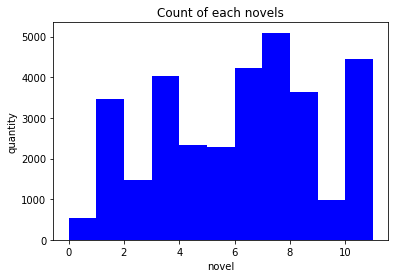

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.hist(ytrain, bins=range(min(ytrain), max(ytrain) + 1, 1),
              alpha=1, color="blue")
plt.xlabel("novel")
plt.ylabel("quantity")
plt.title("Count of each novels")
plt.show()


**The distribution of the classes is not even and it is leaned to classes 6,7,10,8**

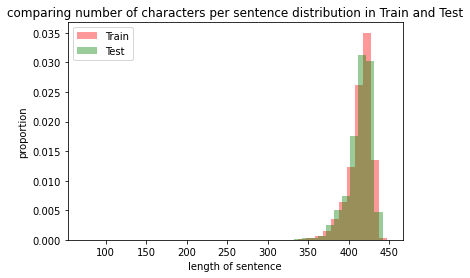

In [9]:
# Length of train and test data distribution

sentence_lengths_train = [ len(sent) for sent in xtrain_obfuscated]
sentence_lengths_test = [ len(sent) for sent in xtest_obfuscated]


plt.hist(sentence_lengths_train, bins=range(min(sentence_lengths_train), max(sentence_lengths_train) + 1, 10), 
              alpha=0.4, color="red", density=True)
plt.hist(sentence_lengths_test, bins=range(min(sentence_lengths_test), max(sentence_lengths_test) + 1, 10),
              alpha=0.4, color="green", density=True)
labels = ['Train',"Test"]
plt.legend(labels)
plt.xlabel("length of sentence")
plt.ylabel("proportion")
plt.title("Character Vs Sentences")
plt.show()

# **As specified in the requirement deeplearning is being used -CNN**

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Concatenate, Dense, Dropout, Softmax
from keras.callbacks import TensorBoard
from time import time


In [12]:

data = xtrain_obfuscated     
label = ytrain

if data[-1] == '':
    data = data[:-1]
    
if label[-1] == '':
    label = label[:-1]

In [13]:
max_char = 26
max_len = 0
for sent in data:
    max_len = max(max_len, len(sent))



In [14]:
#One hot encoding for labels
for i in range(len(label)):
    label[i] = int(label[i])
label = np.asarray(label)
ohe = OneHotEncoder(sparse=False)
label = label.reshape(-1,1)
y_train_data = ohe.fit_transform(label)

In [15]:

# One hot feature generation
# MaxLen = 452. 
# Other sentences are 0 padded
X_train = []
for i in range(len(data)):
    temp = np.zeros((max_len, max_char))
    for j in range(len(data[i])):
        temp[j][ord(data[i][j])-97] = 1
    X_train.append(temp)
X_train = np.asarray(X_train)
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1], X_train.shape[2],1))

**Creating Layers for CNN**

In [16]:

#Creating layers for CNN

convSize_1 = 3
convSize_2 = 4
convSize_3 = 5
convSize_4 = 6
convSize_5 = 7
convSize_6 = 8
convSize_7 = 9
convSize_8 = 10

In [17]:
# Convolution with different kernal sizes
inputLayer = Input(shape=(X_train[0].shape[0],X_train[0].shape[1],1))
convLayer_1 = Conv2D(filters=128, kernel_size=(convSize_1,X_train[0].shape[1]))(inputLayer)
convLayer_2 = Conv2D(filters=128, kernel_size=(convSize_2,X_train[0].shape[1]))(inputLayer)
convLayer_3 = Conv2D(filters=128, kernel_size=(convSize_3,X_train[0].shape[1]))(inputLayer)
convLayer_4 = Conv2D(filters=128, kernel_size=(convSize_4,X_train[0].shape[1]))(inputLayer)
convLayer_5 = Conv2D(filters=128, kernel_size=(convSize_5,X_train[0].shape[1]))(inputLayer)
convLayer_6 = Conv2D(filters=128, kernel_size=(convSize_6,X_train[0].shape[1]))(inputLayer)
convLayer_7 = Conv2D(filters=128, kernel_size=(convSize_7,X_train[0].shape[1]))(inputLayer)
convLayer_8 = Conv2D(filters=128, kernel_size=(convSize_8,X_train[0].shape[1]))(inputLayer)

#Dropout to prevent overfitting
dropout_1 = Dropout(0.5)(convLayer_1)
dropout_2 = Dropout(0.5)(convLayer_2)
dropout_3 = Dropout(0.5)(convLayer_3)
dropout_4 = Dropout(0.5)(convLayer_4)
dropout_5 = Dropout(0.5)(convLayer_5)
dropout_6 = Dropout(0.5)(convLayer_6)
dropout_7 = Dropout(0.5)(convLayer_7)
dropout_8 = Dropout(0.5)(convLayer_8)

#Maxpool within the features
maxPool_1 = MaxPooling2D(pool_size=(max_len-convSize_1+1, 1))(dropout_1)
maxPool_2 = MaxPooling2D(pool_size=(max_len-convSize_2+1, 1))(dropout_2)
maxPool_3 = MaxPooling2D(pool_size=(max_len-convSize_3+1, 1))(dropout_3)
maxPool_4 = MaxPooling2D(pool_size=(max_len-convSize_4+1, 1))(dropout_4)
maxPool_5 = MaxPooling2D(pool_size=(max_len-convSize_5+1, 1))(dropout_5)
maxPool_6 = MaxPooling2D(pool_size=(max_len-convSize_6+1, 1))(dropout_6)
maxPool_7 = MaxPooling2D(pool_size=(max_len-convSize_7+1, 1))(dropout_7)
maxPool_8 = MaxPooling2D(pool_size=(max_len-convSize_8+1, 1))(dropout_8)

#Flatten all the data from CNN model
flatten_1 = Flatten()(maxPool_1)
flatten_2 = Flatten()(maxPool_2)
flatten_3 = Flatten()(maxPool_3)
flatten_4 = Flatten()(maxPool_4)
flatten_5 = Flatten()(maxPool_5)
flatten_6 = Flatten()(maxPool_6)
flatten_7 = Flatten()(maxPool_7)
flatten_8 = Flatten()(maxPool_8)

#Merge all the 8 layers data
mergedLayer = Concatenate(axis=1)([flatten_1, flatten_2, flatten_3, flatten_4, flatten_5, flatten_6, flatten_7, flatten_8])

#Dense layers and so on
dense_1 = Dense(1024, activation='relu')(mergedLayer)
dropout_9 = Dropout(0.5)(dense_1)
dense_2 = Dense(128, activation='relu')(dropout_9)
dropout_10 = Dropout(0.5)(dense_2)

result = Dense(12, activation='softmax')(dropout_10)



In [18]:
model = Model(inputLayer, result)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 452, 26, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 450, 1, 128)  10112       ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 449, 1, 128)  13440       ['input_1[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 448, 1, 128)  16768       ['input_1[0][0]']            

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:

model.fit(X_train, y_train_data, batch_size=128, verbose=1, epochs=50, shuffle=True, validation_split=0.2)


Epoch 1/50
204/204 [==============================] - 410s 2s/step - loss: 1.3058 - accuracy: 0.5496 - val_loss: 1.0983 - val_accuracy: 0.6486
Epoch 2/50
204/204 [==============================] - 410s 2s/step - loss: 1.0117 - accuracy: 0.6583 - val_loss: 0.8920 - val_accuracy: 0.7164
Epoch 3/50
204/204 [==============================] - 410s 2s/step - loss: 0.8540 - accuracy: 0.7157 - val_loss: 0.7677 - val_accuracy: 0.7664
Epoch 4/50
204/204 [==============================] - 409s 2s/step - loss: 0.7611 - accuracy: 0.7493 - val_loss: 0.6970 - val_accuracy: 0.7818
Epoch 5/50
204/204 [==============================] - 409s 2s/step - loss: 0.6763 - accuracy: 0.7814 - val_loss: 0.6518 - val_accuracy: 0.8001
Epoch 6/50
204/204 [==============================] - 414s 2s/step - loss: 0.6260 - accuracy: 0.7958 - val_loss: 0.6002 - val_accuracy: 0.8142
Epoch 7/50
204/204 [==============================] - 417s 2s/step - loss: 0.5809 - accuracy: 0.8113 - val_loss: 0.5890 - val_accuracy: 0.8132

In [22]:
model.save('sword_novel_classification.h5')  #Save the model for future use


**This CNN Model has an Accuracy of 85%**

**Validation File Prediction**


In [24]:
data_val = xtest_obfuscated

In [25]:
#Max_char = 26
# One hot feature generation
# MaxLen = 452. 
# Other sentences are 0 padded
max_len = 452
max_char = 26
y_test = []
for i in range(len(data_val)):
    temp = np.zeros((max_len, max_char))
    for j in range(len(data[i])):
        temp[j][ord(data[i][j])-97] = 1
    y_test.append(temp)
y_test = np.asarray(X_train)
y_test = y_test.reshape((y_test.shape[0],y_test.shape[1], y_test.shape[2],1))

In [26]:
result = model.predict(y_test)

In [27]:
result

array([[1.8931683e-16, 2.9871422e-10, 5.9376641e-13, ..., 7.5015397e-11,
        2.1147344e-09, 8.5227936e-11],
       [1.5769178e-08, 6.9464208e-05, 1.9270648e-05, ..., 8.3499299e-07,
        1.3546989e-03, 1.3339378e-07],
       [1.5792694e-23, 2.4347671e-14, 9.6168305e-24, ..., 1.0971364e-25,
        4.3878498e-16, 7.4538111e-20],
       ...,
       [1.9333106e-09, 1.9688319e-07, 9.2440395e-04, ..., 6.5697435e-07,
        9.9846727e-01, 9.5627989e-08],
       [5.6936955e-08, 4.3047084e-03, 1.0423527e-01, ..., 3.7226181e-03,
        3.2637484e-04, 2.4045850e-03],
       [1.7728179e-16, 5.2224728e-08, 2.9855854e-11, ..., 2.1797000e-13,
        4.0162558e-08, 2.9582042e-13]], dtype=float32)

In [30]:
labels = np.argmax(result, axis=-1)  

In [31]:
labels

array([ 7,  3,  8, ..., 10,  6,  3])

**Saving the xtest_obfuscated's file output to text file**

In [42]:
with open('ytest_pred_output.txt', 'w') as f:
    for line in labels:
        f.write(str(line))
        f.write('\n')
 




In [43]:
with open('ytest_pred_output.txt') as f:
    ycheck = f.read().strip().lower().split('\n')

In [44]:
ycheck

['7',
 '3',
 '8',
 '3',
 '4',
 '8',
 '7',
 '1',
 '7',
 '3',
 '8',
 '1',
 '8',
 '11',
 '7',
 '4',
 '10',
 '9',
 '8',
 '4',
 '11',
 '7',
 '9',
 '1',
 '3',
 '11',
 '2',
 '1',
 '3',
 '11',
 '1',
 '6',
 '7',
 '7',
 '6',
 '2',
 '6',
 '1',
 '5',
 '8',
 '2',
 '1',
 '8',
 '6',
 '7',
 '1',
 '6',
 '1',
 '8',
 '8',
 '1',
 '5',
 '10',
 '1',
 '10',
 '10',
 '3',
 '3',
 '3',
 '10',
 '7',
 '1',
 '4',
 '2',
 '8',
 '1',
 '7',
 '3',
 '3',
 '11',
 '3',
 '1',
 '11',
 '9',
 '1',
 '3',
 '4',
 '7',
 '3',
 '3',
 '8',
 '1',
 '8',
 '6',
 '3',
 '5',
 '8',
 '5',
 '4',
 '10',
 '1',
 '7',
 '6',
 '2',
 '7',
 '6',
 '8',
 '9',
 '5',
 '4',
 '8',
 '6',
 '1',
 '4',
 '1',
 '7',
 '7',
 '7',
 '2',
 '3',
 '2',
 '10',
 '7',
 '7',
 '3',
 '7',
 '1',
 '6',
 '6',
 '8',
 '6',
 '8',
 '0',
 '4',
 '9',
 '1',
 '3',
 '7',
 '4',
 '11',
 '8',
 '4',
 '9',
 '8',
 '0',
 '2',
 '10',
 '1',
 '4',
 '8',
 '3',
 '1',
 '6',
 '1',
 '5',
 '11',
 '8',
 '8',
 '1',
 '7',
 '6',
 '3',
 '7',
 '4',
 '6',
 '10',
 '10',
 '5',
 '6',
 '4',
 '8',
 '6',
 '1',
 '6'